In [2]:
import cv2
import yt_dlp as youtube_dl  # Use yt-dlp instead of youtube-dl
from IPython.display import Image, display  # For displaying image in Jupyter

import schedule
import time

In [3]:
live_url = "https://www.youtube.com/watch?v=LMZQ7eFhm58"

In [6]:
def stream_url(youtube_url):
    """Extract live stream URL"""
    with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
        info = ydl.extract_info(youtube_url, download=False)
        stream_url = info['url']
    return stream_url

def capture_frame(stream_url, crop_region=None):
    """Capture a frame from the live stream with cropped a region"""
    cap = cv2.VideoCapture(stream_url)
    if not cap.isOpened():
        print("Error: Could not open video stream.")
        return None

    ret, frame = cap.read()
    if ret:
        if crop_region:
            x, y, w, h = crop_region
            frame = frame[y:y+h, x:x+w]
        path = "frame_" + str(int(time.time())) + ".jpg"
        cv2.imwrite(path, frame)
        return path
    else:
        print("Error: Could not capture frame.")
        return None

In [7]:
url = stream_url(live_url)

[youtube] Extracting URL: https://www.youtube.com/watch?v=LMZQ7eFhm58
[youtube] LMZQ7eFhm58: Downloading webpage
[youtube] LMZQ7eFhm58: Downloading ios player API JSON
[youtube] LMZQ7eFhm58: Downloading web creator player API JSON
[youtube] LMZQ7eFhm58: Downloading m3u8 information
[youtube] LMZQ7eFhm58: Downloading m3u8 information


In [8]:
display(Image(capture_frame(url, (0,0,500,30))))

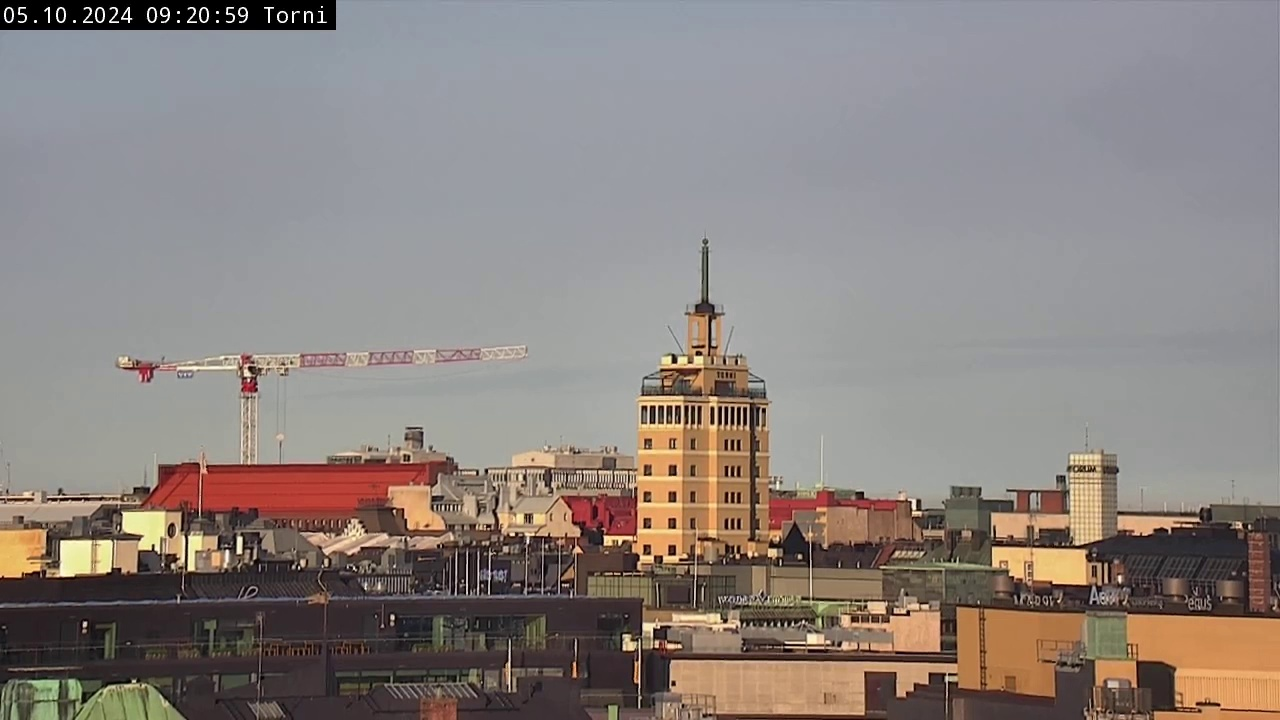

In [9]:
display(Image(capture_frame(url)))

In [10]:
for i in range(100):
    print(i)
    capture_frame(url)
    time.sleep(1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [46]:
!ls

frame_1727528671.jpg  frame_1727529182.jpg  frame_1727529699.jpg
frame_1727528736.jpg  frame_1727529253.jpg  frame_1727529763.jpg
frame_1727528801.jpg  frame_1727529316.jpg  frame_1727529826.jpg
frame_1727528865.jpg  frame_1727529380.jpg  frame_1727529890.jpg
frame_1727528928.jpg  frame_1727529443.jpg  LICENSE
frame_1727528992.jpg  frame_1727529507.jpg  README.md
frame_1727529055.jpg  frame_1727529571.jpg  Untitled.ipynb
frame_1727529119.jpg  frame_1727529636.jpg


In [7]:
from pathlib import Path
from PIL import Image
import pytesseract

def datetime_and_place(image_path):
    places = [
        "Olympiaterminaali",
        "Etelasatama",
        "Presidentinlinna",
        "Tuomiokirkko",
        "Kauppatori",
        "Torni",
    ]
    title_rectangle = (0,0,500,30)
    image = Image.open(image_path).crop(title_rectangle)
    text = pytesseract.image_to_string(image).strip()
    date_obj = datetime.strptime(text[:19], "%d.%m.%Y %H:%M:%S")
    for i, p in enumerate(places):
        if p in text[20:]:
            return date_obj, places[i]
    
for o in Path('.').glob('*.jpg'):
    try:
        datetime, place = datetime_and_place(o)
        print(f"{o.name}: {datetime} {place}")
    except:
        print(f"Removing {o.name}")
        o.unlink()